<a href="https://colab.research.google.com/github/pipit20/Market-Prices-of-Commodities-in-South-Tangerang/blob/main/Commodity_Market_Prices_South_Tangerang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/tangsel_commodity_prices.csv")

print(df.head())
print(df.info())


            commodity           market        date  price
0  Beras Premium (kg)  Pasar Cimanggis  06/02/2018  12800
1  Beras Premium (kg)  Pasar Cimanggis  07/02/2018  16000
2  Beras Premium (kg)  Pasar Cimanggis  08/02/2018  17000
3  Beras Premium (kg)  Pasar Cimanggis  09/02/2018  18000
4  Beras Premium (kg)  Pasar Cimanggis  12/02/2018  20000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333778 entries, 0 to 333777
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   commodity  333778 non-null  object
 1   market     333778 non-null  object
 2   date       333778 non-null  object
 3   price      333778 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 10.2+ MB
None


Langkah awal analisis dimulai dengan memanggil tiga library utama, yaitu pandas untuk mengolah data, numpy untuk perhitungan angka, dan matplotlib untuk membuat grafik. Setelah itu, dataset harga komoditas Tangerang Selatan dibuka dengan perintah read_csv() dan disimpan ke dalam variabel df. Untuk mengecek apakah data sudah terbaca dengan benar, ditampilkan beberapa contoh data teratas menggunakan head(), serta informasi ringkas mengenai struktur dataset melalui info().

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

print(df.isnull().sum())

commodity    0
market       0
date         0
price        0
month        0
year         0
dtype: int64


Langkah ini digunakan untuk mempersiapkan data agar lebih mudah dianalisis. Pertama, kolom date diubah ke format tanggal dengan to_datetime() supaya bisa dipakai untuk analisis waktu. Dari kolom tanggal ini kemudian dibuat dua kolom baru, yaitu month untuk menyimpan bulan dan year untuk menyimpan tahun. Terakhir, data diperiksa dengan isnull().sum() untuk memastikan tidak ada data yang kosong pada kolom-kolom yang ada.

In [ ]:
avg_price = df['price'].mean()

highest_commodity = df.groupby("commodity")['price'].mean().idxmax()
highest_price = df.groupby("commodity")['price'].mean().max()

lowest_commodity = df.groupby("commodity")['price'].mean().idxmin()
lowest_price = df.groupby("commodity")['price'].mean().min()

market_price = df.groupby("market")['price'].mean()
cheapest_market = market_price.idxmin()
expensive_market = market_price.idxmax()

print(f"Rata-rata harga: {avg_price:.2f}")
print(f"Komoditas termahal: {highest_commodity} ({highest_price:.2f})")
print(f"Komoditas termurah: {lowest_commodity} ({lowest_price:.2f})")
print(f"Pasar termurah: {cheapest_market}")
print(f"Pasar termahal: {expensive_market}")

Rata-rata harga: 29748.88
Komoditas termahal: Ikan Teri Medan (kg) (126618.89)
Komoditas termurah: Mie Instan (bungkus) (2778.29)
Pasar termurah: Pasar Jengkol
Pasar termahal: Pasar Ceger


Di tahap ini kita mencari insight utama dari data harga komoditas. Pertama dihitung rata-rata harga semua komoditas. Lalu dicek komoditas mana yang paling mahal dan mana yang paling murah berdasarkan harga rata-rata. Analisis juga dilakukan untuk pasar, sehingga bisa diketahui pasar mana yang harganya paling murah dan mana yang paling mahal. Hasil ini berguna sebagai ringkasan cepat atau KPI di dashboard agar pengguna langsung bisa melihat perbandingan harga antar komoditas dan antar pasar.

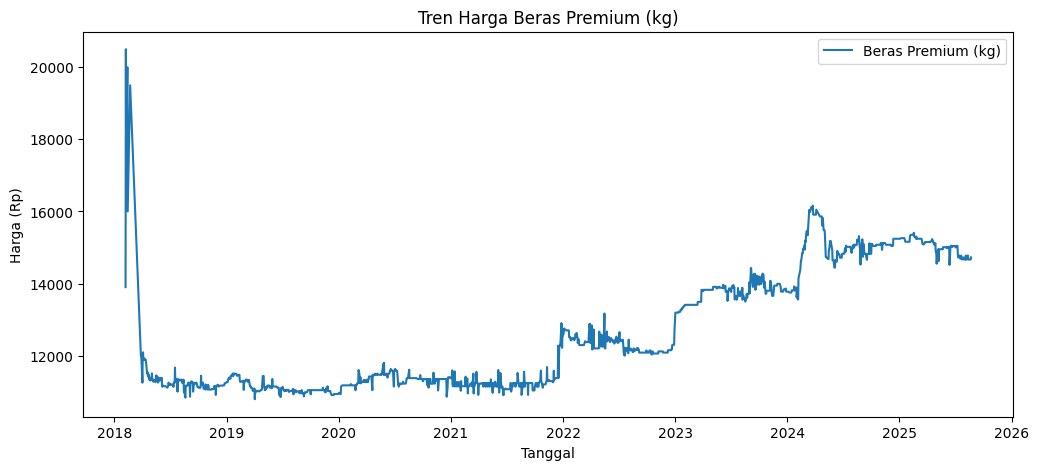

In [ ]:
komoditas = "Beras Premium (kg)"
df_beras = df[df['commodity'] == komoditas].groupby("date")['price'].mean()

plt.figure(figsize=(12,5))
plt.plot(df_beras.index, df_beras.values, label=komoditas)
plt.title(f"Tren Harga {komoditas}")
plt.xlabel("Tanggal")
plt.ylabel("Harga (Rp)")
plt.legend()
plt.show()

Di sini kita fokus pada satu komoditas, yaitu Beras Premium (kg). Data difilter agar hanya menampilkan beras premium, lalu dihitung rata-rata harga harian. Setelah itu, dibuat grafik garis untuk menunjukkan pergerakan harga dari waktu ke waktu. Dengan grafik ini, kita bisa melihat tren kenaikan atau penurunan harga beras premium, sehingga mudah dipahami bagaimana perubahan harga terjadi sepanjang periode data.

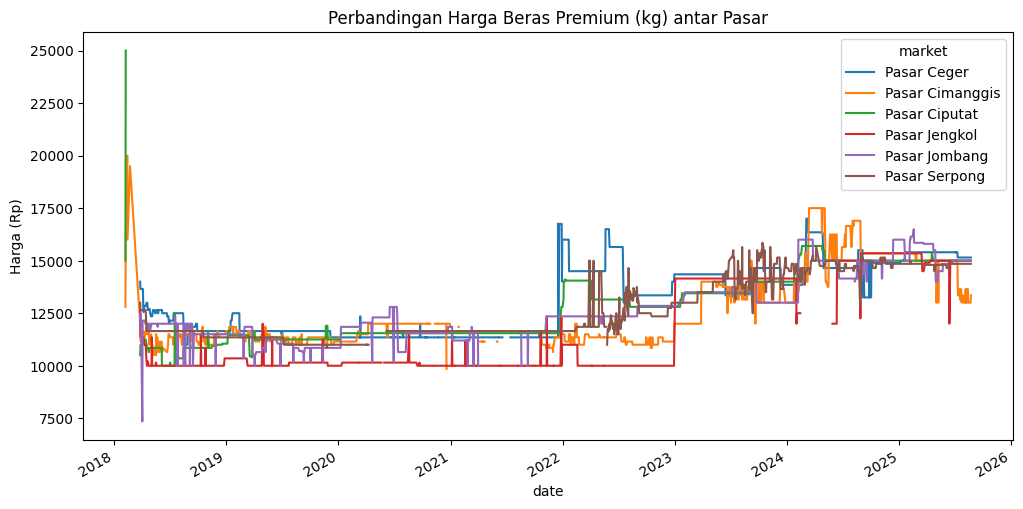

In [ ]:
df_compare = df[df['commodity'] == komoditas].groupby(["date","market"])['price'].mean().unstack()

df_compare.plot(figsize=(12,6))
plt.title(f"Perbandingan Harga {komoditas} antar Pasar")
plt.ylabel("Harga (Rp)")
plt.show()

Kode ini menampilkan perbandingan harga Beras Premium (kg) di berbagai pasar. Data diolah supaya setiap pasar punya garis sendiri dalam grafik. Hasilnya adalah grafik garis yang menunjukkan bagaimana harga beras premium bergerak di tiap pasar dari waktu ke waktu. Dengan grafik ini, kita bisa dengan mudah melihat pasar mana yang paling mahal, mana yang paling murah, serta kapan perbedaan harga antar pasar semakin besar atau mengecil.

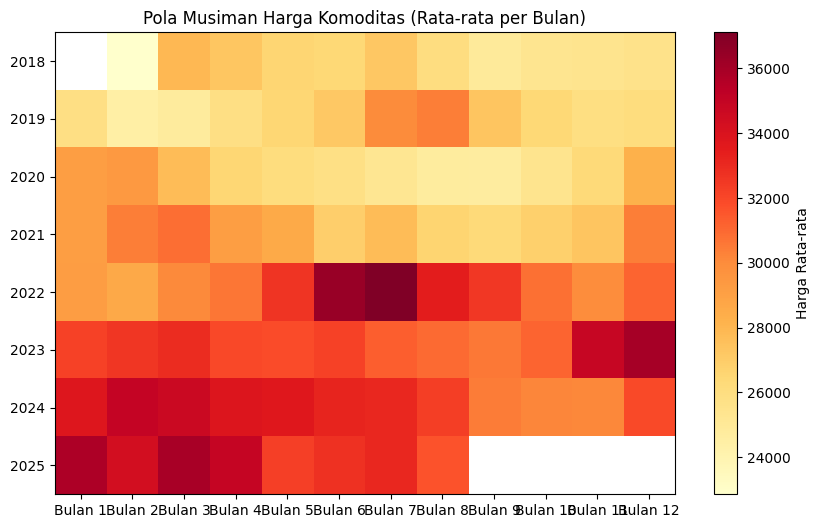

In [ ]:
pivot_season = df.groupby(['year','month'])['price'].mean().unstack()

plt.figure(figsize=(10,6))
plt.imshow(pivot_season, cmap="YlOrRd", aspect="auto")
plt.colorbar(label="Harga Rata-rata")
plt.xticks(range(12), [f"Bulan {i+1}" for i in range(12)])
plt.yticks(range(len(pivot_season.index)), pivot_season.index)
plt.title("Pola Musiman Harga Komoditas (Rata-rata per Bulan)")
plt.show()

membuat heatmap untuk melihat pola musiman harga komoditas. Baris menunjukkan tahun, kolom menunjukkan bulan, dan warnanya menunjukkan rata-rata harga. Semakin merah, semakin mahal. Dari sini kita bisa cepat melihat bulan apa saja harga cenderung naik (misalnya menjelang hari raya) atau turun. Grafik ini membantu memahami pola musiman yang memengaruhi harga komoditas di pasar.

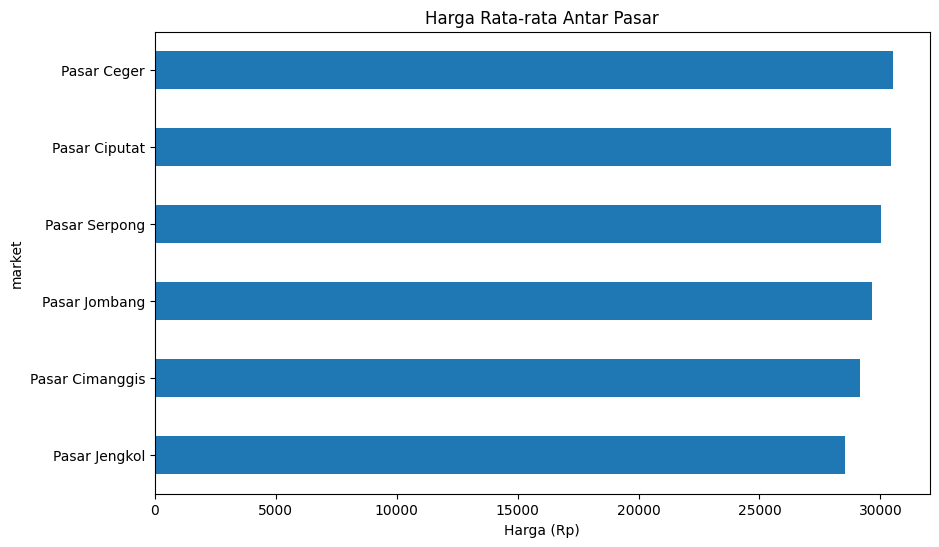

In [ ]:
df_market_avg = df.groupby("market")['price'].mean().sort_values()

df_market_avg.plot(kind='barh', figsize=(10,6))
plt.title("Harga Rata-rata Antar Pasar")
plt.xlabel("Harga (Rp)")
plt.show()

membuat grafik batang horizontal untuk membandingkan harga rata-rata antar pasar. Pasar dengan harga lebih murah ada di bagian bawah, sementara pasar dengan harga lebih mahal ada di atas. Visualisasi ini memudahkan untuk melihat pasar mana yang paling murah dan paling mahal secara cepat.

In [ ]:
df_monthly = df.groupby(['year','month','commodity'])['price'].mean().reset_index()
df_monthly['year_month'] = pd.to_datetime(df_monthly['year'].astype(str) + '-' + df_monthly['month'].astype(str) + '-01')

df_monthly['pct_change'] = df_monthly.groupby('commodity')['price'].pct_change()*100

latest_month = df_monthly['year_month'].max()
df_latest = df_monthly[df_monthly['year_month']==latest_month]

top_5 = df_latest.sort_values("pct_change", ascending=False).head(5)
print(top_5[['commodity','pct_change']])


                       commodity  pct_change
2971         Beras Termurah (kg)    1.432771
2989                    Kol (kg)    1.139664
2979            Garam Bata (pcs)    1.056005
2995  Susu Bubuk Dancow (400 gr)    0.310064
2981      Gula Dalam Negeri (kg)    0.101446


Kode ini digunakan untuk mencari 5 komoditas dengan kenaikan harga terbesar pada bulan terakhir dalam dataset. Prosesnya dilakukan dengan menghitung rata-rata harga bulanan, lalu mencari persentase perubahan dibandingkan bulan sebelumnya.

In [ ]:
print(df['commodity'].unique())

['Beras Premium (kg)' 'Beras Medium (kg)' 'Beras Termurah (kg)'
 'Gula Dalam Negeri (kg)' 'Minyak Goreng Bimoli (2 liter)'
 'Minyak Goreng Curah (kg)' 'Daging Ayam Broiler (kg)'
 'Daging Ayam Kampung (ekor)' 'Daging Sapi Murni (kg)'
 'Telur Ayam Broiler (kg)' 'Telur Ayam Kampung (butir)'
 'SKM Bendera (397 gr/kl)' 'SKM Indomilk (390 gr/kl)'
 'Susu Bubuk Dancow (400 gr)' 'Jagung Pipilan Kering (kg)'
 'Garam Halus (250 gr)' 'Garam Bata (pcs)' 'Tepung Terigu (kg)'
 'Mie Instan (bungkus)' 'Cabai Merah Keriting (kg)'
 'Cabai Merah Besar (kg)' 'Cabai Rawit Merah (kg)'
 'Cabai Rawit Hijau (kg)' 'Bawang Merah (kg)' 'Bawang Putih (kg)'
 'Ikan Teri Medan (kg)' 'Kacang Kedelai (kg)' 'Kacang Tanah (kg)'
 'Kacang Hijau (kg)' 'Ketela Pohon (kg)' 'Kol (kg)' 'Tomat (kg)'
 'Ikan Kembung (kg)']


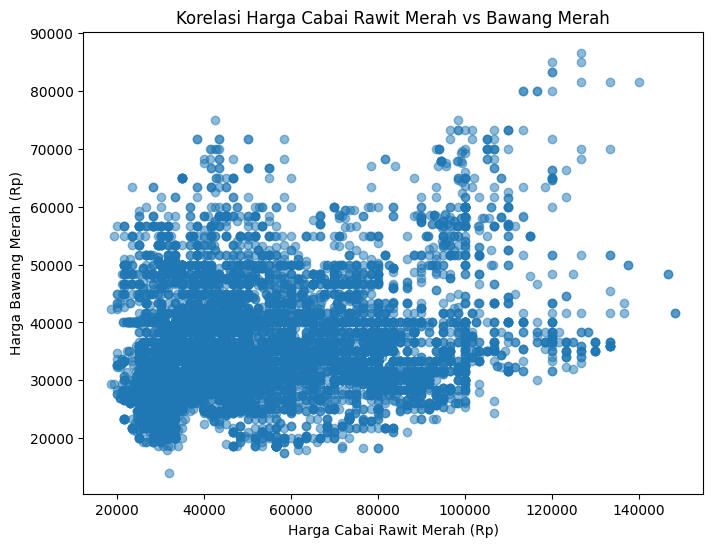

In [ ]:
df_corr = df[df['commodity'].isin(['Cabai Rawit Merah (kg)', 'Bawang Merah (kg)'])]

df_pivot = df_corr.pivot_table(
    index=['date','market'],
    columns='commodity',
    values='price',
    aggfunc='mean'
).reset_index()

plt.figure(figsize=(8,6))
plt.scatter(df_pivot['Cabai Rawit Merah (kg)'], df_pivot['Bawang Merah (kg)'], alpha=0.5)
plt.xlabel("Harga Cabai Rawit Merah (Rp)")
plt.ylabel("Harga Bawang Merah (Rp)")
plt.title("Korelasi Harga Cabai Rawit Merah vs Bawang Merah")
plt.show()

menampilkan visualisasi hubungan harga antara Cabai Rawit Merah dan Bawang Merah di berbagai pasar. Data difilter hanya untuk kedua komoditas tersebut, kemudian diubah menjadi format pivot agar tiap baris mewakili harga harian per pasar. Selanjutnya dibuat scatter plot yang menunjukkan bagaimana harga Cabai Rawit Merah dan Bawang Merah bergerak bersamaan; titik-titik yang lebih rapat atau membentuk pola linier menunjukkan adanya korelasi antara kedua harga komoditas tersebut.

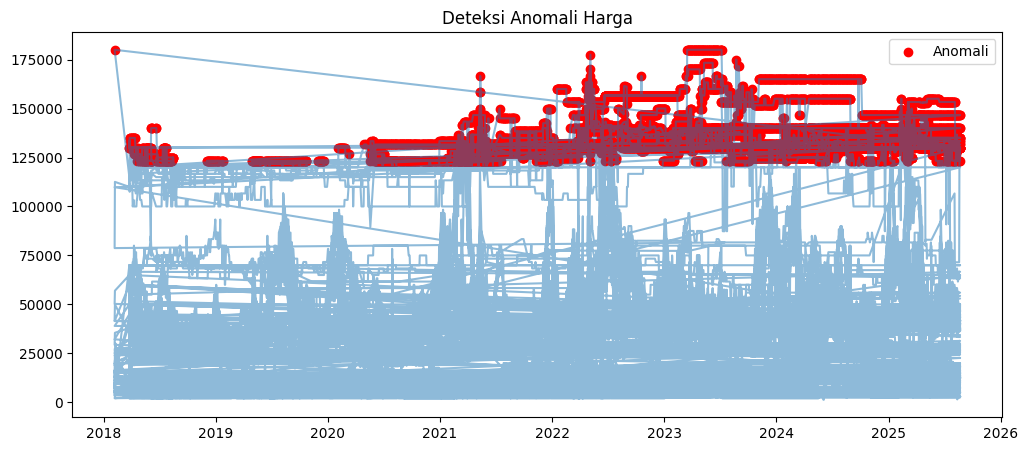

In [ ]:
df['zscore'] = (df['price'] - df['price'].mean())/df['price'].std()
anomali = df[np.abs(df['zscore'])>3]
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['price'], alpha=0.5)
plt.scatter(anomali['date'], anomali['price'], color='red', label='Anomali')
plt.legend()
plt.title("Deteksi Anomali Harga")
plt.show()


Kode ini digunakan untuk mendeteksi anomali harga dalam data komoditas. Pertama, dihitung z-score dari harga untuk mengukur seberapa jauh setiap harga menyimpang dari rata-rata dalam satuan standar deviasi. Data yang memiliki |z-score| lebih dari 3 dianggap anomali. Kemudian dibuat plot garis harga dari waktu ke waktu, dengan titik-titik merah menandai anomali harga yang signifikan, sehingga memudahkan identifikasi lonjakan atau penurunan harga yang tidak biasa.

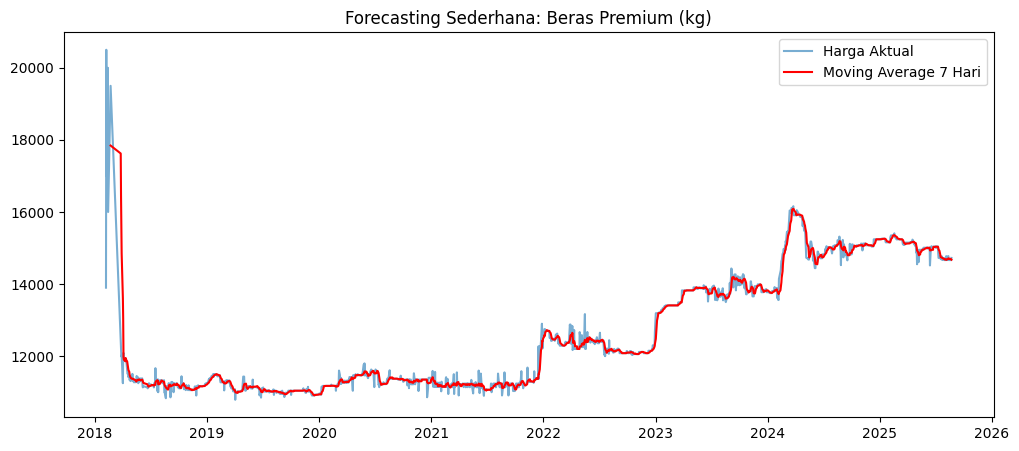

In [ ]:
df_forecast = df[df['commodity']==komoditas].groupby("date")['price'].mean().reset_index()
df_forecast['MA_7'] = df_forecast['price'].rolling(window=7).mean()

plt.figure(figsize=(12,5))
plt.plot(df_forecast['date'], df_forecast['price'], label="Harga Aktual", alpha=0.6)
plt.plot(df_forecast['date'], df_forecast['MA_7'], label="Moving Average 7 Hari", color='red')
plt.title(f"Forecasting Sederhana: {komoditas}")
plt.legend()
plt.show()


forecasting sederhana menggunakan moving average 7 hari untuk suatu komoditas tertentu. Harga harian dirata-ratakan per tanggal, lalu dihitung rata-rata bergerak (MA) 7 hari untuk melihat tren jangka pendek. Plot menampilkan harga aktual sebagai garis utama dan MA 7 hari sebagai garis merah, sehingga memudahkan melihat pola tren dan fluktuasi harga komoditas dari waktu ke waktu.